# Notebook概要：
- 第一部分：查看商店表的列缺失率、缺失关联及列分布
- 第二部分：探索用户的view表
- 第三部分：探索用户的pay表
- 第四部分：商户历史时序数据探索

## 第一部分：

In [1]:
#!/usr/bin/env python
# coding=utf-8
# -------- import basic package --------
%pylab inline
import pdb
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import warnings
import random
import datetime as dt
import matplotlib.pylab as plt

PATH = 'F:/codeGit/dataset/koubei/dataset/'
FILE_SHOP = 'shop_info.csv'
FILE_PAY = 'user_pay.csv'
FILE_VIEW = 'user_view.csv'

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_shop = pd.read_csv(PATH + FILE_SHOP)
print df_shop[:10]

   shop_id city_name  location_id  per_pay  score  comment_cnt  shop_level  \
0        1        湖州          885        8    4.0         12.0           2   
1        2       哈尔滨           64       19    NaN          NaN           1   
2        3        南昌          774        5    3.0          2.0           0   
3        4        天津          380       18    NaN          NaN           1   
4        5        杭州          263        2    2.0          2.0           0   
5        6        大连         1139       13    3.0          1.0           0   
6        7        绍兴          145       13    3.0          9.0           2   
7        8        杭州          234       16    3.0          1.0           0   
8        9        杭州         1120       15    4.0          0.0           1   
9       10        孝感           98       10    NaN          NaN           0   

  cate_1_name cate_2_name cate_3_name  
0          美食        休闲茶饮       饮品/甜点  
1       超市便利店          超市         NaN  
2          美食        

In [8]:
print len(df_shop)

2000


   shop_id city_name  location_id  per_pay  score  comment_cnt  shop_level  \
0        1        湖州          885        8    4.0         12.0           2   
1        2       哈尔滨           64       19    NaN          NaN           1   
2        3        南昌          774        5    3.0          2.0           0   
3        4        天津          380       18    NaN          NaN           1   
4        5        杭州          263        2    2.0          2.0           0   
5        6        大连         1139       13    3.0          1.0           0   
6        7        绍兴          145       13    3.0          9.0           2   
7        8        杭州          234       16    3.0          1.0           0   
8        9        杭州         1120       15    4.0          0.0           1   
9       10        孝感           98       10    NaN          NaN           0   

  cate_1_name cate_2_name cate_3_name  
0          美食        休闲茶饮       饮品/甜点  
1       超市便利店          超市         NaN  
2          美食        

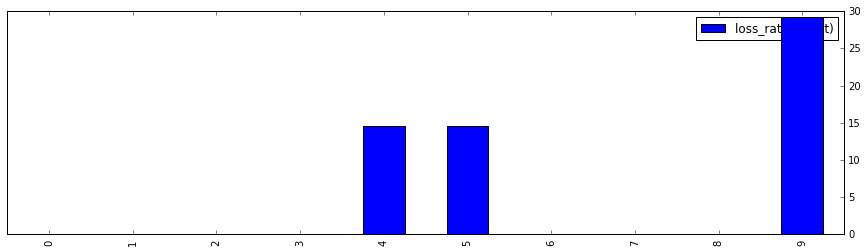

In [3]:
## 查看列缺失率
def detectMissingRatio(df):
    # pdb.set_trace()
    print("\n ratio of the missing value for every column:\n")

    columns = df.columns.tolist()
    lossRatio = []
    index = 0
    for col in columns:
        if df[col].count() == df[col].size:
            print 'inedx %d %s: no missing value' %(index, col)
            lossRatio.append(0)
        else: 
            print 'inedx %d %s: %.2f%%' %(index, col, (1.0 - 1.0 * df[col].count() / df[col].size) * 100)
            lossRatio.append((1.0 - 1.0 * df[col].count() / df[col].size) * 100)
        index = index + 1

    print '\n ratio of the missing value for the table: %.2f%%' %((1.0 - 1.0 * df.count().sum() / df.size)  * 100)
    df_statis = DataFrame(np.array([columns, lossRatio]).T, columns = ['col', 'loss_ratio'])
    df_statis['loss_ratio'] = df_statis['loss_ratio'].apply(lambda x : float(x))
    df_statis.plot(kind='bar', secondary_y=['loss_ratio'], figsize=(15, 4))
    
print df_shop[:10]    
detectMissingRatio(df_shop)


 ratio of the missing value for every column:

inedx 0 shop_id: no missing value
inedx 1 city_name: no missing value
inedx 2 location_id: no missing value
inedx 3 per_pay: no missing value
inedx 4 score: no missing value
inedx 5 comment_cnt: no missing value
inedx 6 shop_level: no missing value
inedx 7 cate_1_name: no missing value
inedx 8 cate_2_name: no missing value
inedx 9 cate_3_name: 17.20%

 ratio of the missing value for the table: 1.72%


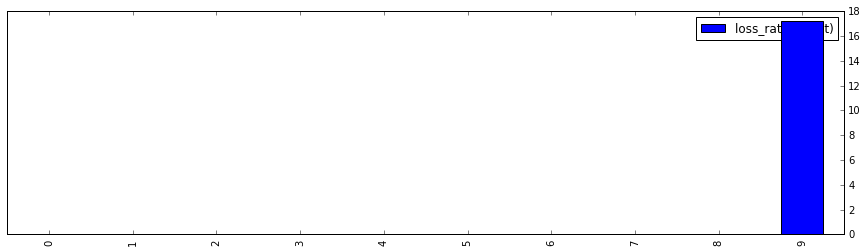

In [4]:
df = df_shop[pd.notnull(df_shop['score'])]
detectMissingRatio(df)

由上可以发现，score缺失的商店，其conmment_cnt也缺失

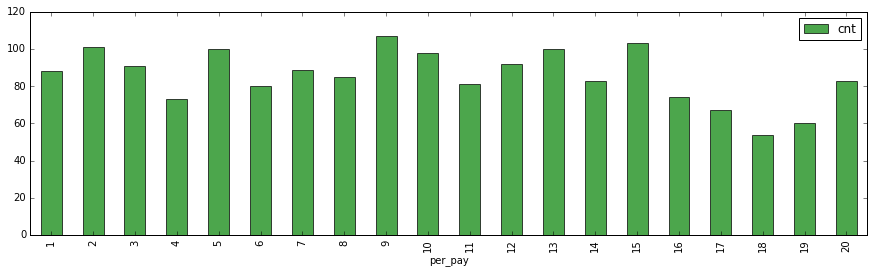

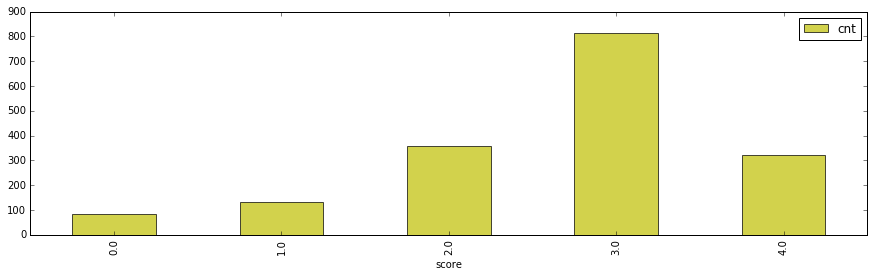

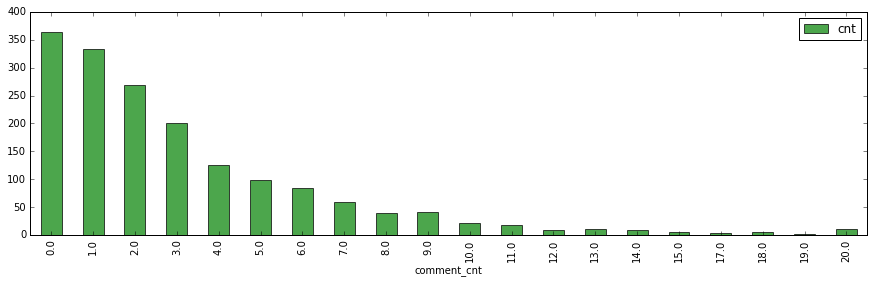

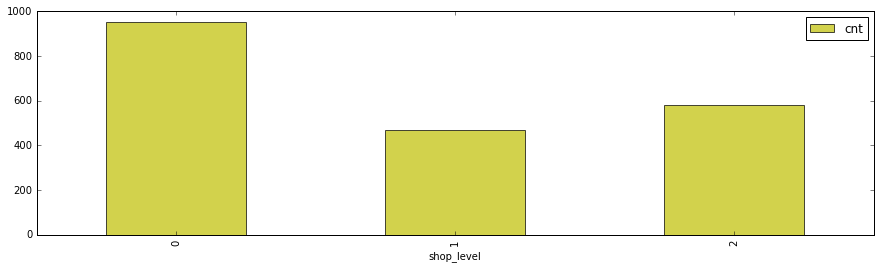

In [5]:
def drawDistribuMap(df, columns):
    fig = plt.figure()
    colorList = ['r', 'b', 'g', 'y', 'c']
    for col in columns:
        if col == columns[0]:
            sentryCol = columns[1]
        else: 
            sentryCol = columns[0]
        # print df.groupby(col).count()[sentryCol].reset_index()
        df_cnt = df.groupby(col).count()[[sentryCol]]
        df_cnt.columns = ['cnt']

        color = colorList[random.randint(0, len(colorList) - 1)]
        df_cnt.plot(kind='bar', figsize=(15, 4), alpha = 0.7, color = color)

drawDistribuMap(df_shop, ['per_pay', 'score', 'comment_cnt', 'shop_level'])

由上易知，未有score与comment缺失的商店，其comment_cnt与score也有为0的情况，故score与comment值缺失不能直接设置为0

## 第二部分：

In [129]:
df_view = pd.read_csv(PATH + FILE_VIEW)

df_view['time'] = pd.to_datetime(df_view['time'])
df_view['date'] = df_view['time'].dt.strftime('%Y-%m-%d')
df_view['year'] = df_view['time'].dt.year
df_view['month'] = df_view['time'].dt.month
df_view['day'] = df_view['time'].dt.day
df_view['hour'] = df_view['time'].dt.hour
df_view = df_view.drop(['time'], axis = 1)
df_view.set_index(['user_id', 'shop_id'])
print df_view[:10]

    user_id  shop_id        date  year  month  day  hour
0  13201967     1197  2016-10-21  2016     10   21    18
1  19461365     1197  2016-06-28  2016      6   28    23
2  15022321     1197  2016-07-16  2016      7   16    19
3   5440872     1197  2016-07-15  2016      7   15     7
4  12594529     1197  2016-08-07  2016      8    7    16
5   5440872     1197  2016-08-12  2016      8   12     8
6  19918044     1197  2016-09-03  2016      9    3    16
7   9476039     1197  2016-09-04  2016      9    4    17
8   4081995     1197  2016-09-25  2016      9   25    10
9  12594529     1197  2016-08-07  2016      8    7    16


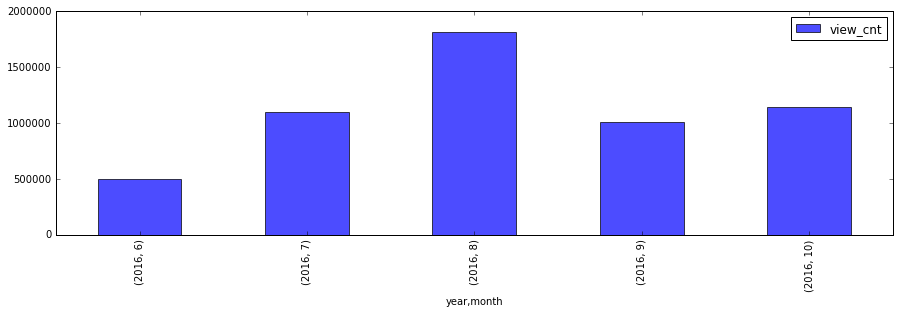

In [7]:
df_view_per_month = DataFrame(dict(
        view_cnt = df_view.groupby(['year', 'month']).size()
        ))
df_view_per_month.plot(kind='bar', figsize=(15, 4), alpha = 0.7, color = 'b')

如上所示，view表只有2016年6月-2016年10月的数据。完整的

In [ ]:
df_view = DataFrame(dict(
        view_cnt = df_view.groupby(['shop_id', 'date']).size()
        )).reset_index()
df_view.set_index(['shop_id'])
day_begin = pd.to_datetime('2016-06-22')
#df_view['day_id'] = df_view['date'].apply(lambda x : (pd.to_datetime(x) - day_begin).days)

print df_view[:10]

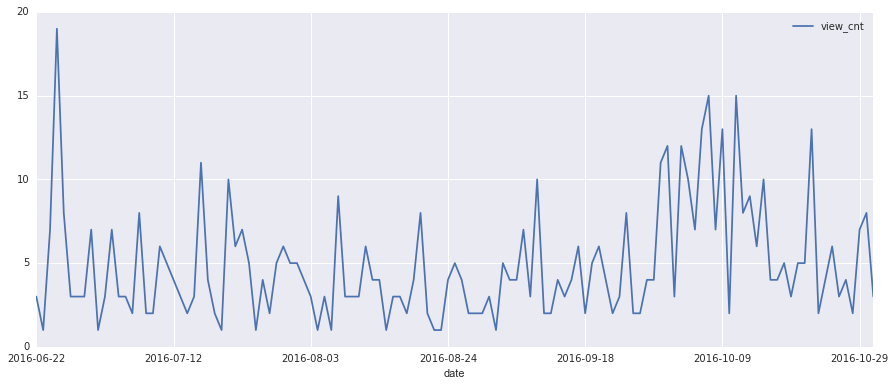

In [57]:
df_view_s1 = df_view[df_view['shop_id'] == 3]
df_view_s1.index = df_view_s1['date']
df_view_s1[['date', 'view_cnt']].plot(kind='line', figsize=(15, 6))  

由上随机抽取的商户走势图，有没有可能view与pay两个时间序列存在滞后性的影响，如两个view时序可以预测pay序列

In [143]:
df_temp_view = df_temp
df_view_fillna = pd.merge(
    df_view[['shop_id', 'date', 'view_cnt']],
    df_temp_view,
    on = ['shop_id', 'date'], how = 'right'
 ).reset_index()
df_view_fillna = df_view[['shop_id', 'date', 'view_cnt']].fillna(0)
df_view_fillna['shop_id'] = df_view_fillna['shop_id'].apply(lambda x : int(x))
print df_view_fillna
df_view_fillna.to_csv(PATH + 'df_view_fillna.csv', index = False, mode = 'w')

        shop_id        date  view_cnt
0             1  2016-06-22       1.0
1             1  2016-06-23       1.0
2             1  2016-06-24       1.0
3             1  2016-06-25       1.0
4             1  2016-06-26       1.0
5             1  2016-06-27       1.0
6             1  2016-06-28       1.0
7             1  2016-06-29       1.0
8             1  2016-06-30       1.0
9             1  2016-07-01       1.0
10            1  2016-07-02       1.0
11            1  2016-07-03       1.0
12            1  2016-07-04       1.0
13            1  2016-07-05       1.0
14            1  2016-07-06       1.0
15            1  2016-07-07       1.0
16            1  2016-07-08       1.0
17            1  2016-07-09       1.0
18            1  2016-07-10       1.0
19            1  2016-07-11       1.0
20            1  2016-07-12       1.0
21            1  2016-07-13       1.0
22            1  2016-07-14       1.0
23            1  2016-07-15       1.0
24            1  2016-07-16       1.0
25          

## 第三部分

用户pay的文件读入内存处理需要内存资源极大，故转移到sql中进行处理，再调回到python中的pandas处理  
写入sql的代码参见上一级sql文件夹里的write2sql.py文件

In [10]:
import MySQLdb
db = MySQLdb.connect("localhost", "root", "7366798", "tianchi_koubei")
cursor = db.cursor()
# sql ='alter table user_pay add index time_idx (time(7));'
sql ='select\
        user_id,\
        shop_id,\
        time\
    from\
        user_pay\
    where\
        time >= "2016-05" and time < "2016-07";'
cursor.execute(sql)
df_pay = DataFrame(list(cursor.fetchall()), columns = ['user_id', 'shop_id', 'time'])
db.close()

**也可以直接使用dataframe自带的read_sql方法读取:**
```
sql = "SELECT name, n from table"
df = pd.read_sql(sql, connection)
```

In [8]:
df_pay = pd.read_csv(PATH + 'user_pay_201606.csv')
print df_pay[:10]

    user_id  shop_id                 time
0  20244878     1862  2016-05-29 16:00:00
1  20244878     1862  2016-06-26 15:00:00
2  14438936     1862  2016-06-26 15:00:00
3    438444     1862  2016-05-12 20:00:00
4   6288662     1862  2016-06-19 14:00:00
5  20210882     1862  2016-05-03 21:00:00
6  20210882     1862  2016-05-01 18:00:00
7  17126501     1862  2016-06-04 20:00:00
8  20244878     1862  2016-05-22 15:00:00
9  10582610     1862  2016-05-30 18:00:00


In [13]:
df_pay.to_csv(PATH + 'user_pay_201606.csv', index = False, mode = 'w')
df_pay['time'] = pd.to_datetime(df_pay['time'])
df_pay['date'] = df_pay['time'].dt.strftime('%Y-%m-%d')
df_pay['year'] = df_pay['time'].dt.year
df_pay['month'] = df_pay['time'].dt.month
df_pay['day'] = df_pay['time'].dt.day
df_pay['hour'] = df_pay['time'].dt.hour
df_pay = df_pay.drop(['time'], axis = 1)
df_pay.set_index(['user_id', 'shop_id'])
print df_pay[:10]

    user_id  shop_id        date  year  month  day  hour
0  20244878     1862  2016-05-29  2016      5   29    16
1  20244878     1862  2016-06-26  2016      6   26    15
2  14438936     1862  2016-06-26  2016      6   26    15
3    438444     1862  2016-05-12  2016      5   12    20
4   6288662     1862  2016-06-19  2016      6   19    14
5  20210882     1862  2016-05-03  2016      5    3    21
6  20210882     1862  2016-05-01  2016      5    1    18
7  17126501     1862  2016-06-04  2016      6    4    20
8  20244878     1862  2016-05-22  2016      5   22    15
9  10582610     1862  2016-05-30  2016      5   30    18


In [16]:
# df_2016_6_pay = df_pay[(df_pay.year == 2016) & (df_pay.month == 6)]
sd_pay_tab = pd.DataFrame(dict(
        user_pay_cnt = df_pay.groupby(['shop_id', 'date']).size()
        )).reset_index()
print sd_pay_tab[:10]

   shop_id        date  user_pay_cnt
0        1  2016-05-01           224
1        1  2016-05-02           190
2        1  2016-05-03           219
3        1  2016-05-04           183
4        1  2016-05-05           168
5        1  2016-05-06           286
6        1  2016-05-07           215
7        1  2016-05-08           266
8        1  2016-05-09           142
9        1  2016-05-10           222


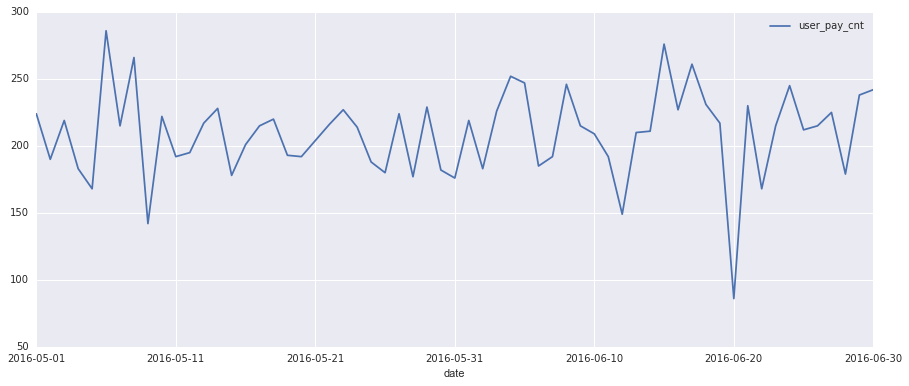

In [24]:
df_shop1 = sd_pay_tab[sd_pay_tab.shop_id == 1]
df_shop1.index = df_shop1.date
df_shop1[['date', 'user_pay_cnt']].plot(kind='line', figsize=(15, 6)) 

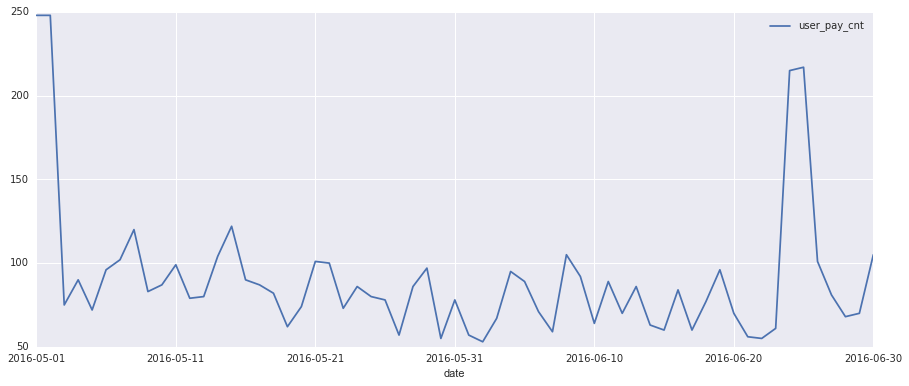

In [25]:
df_shop2 = sd_pay_tab[sd_pay_tab.shop_id == 2]
df_shop2.index = df_shop1.date
df_shop2[['date', 'user_pay_cnt']].plot(kind='line', figsize=(15, 6)) 

In [26]:
db = MySQLdb.connect("localhost", "root", "7366798", "tianchi_koubei")
cursor = db.cursor()
sql ='alter table user_pay add index shop_idx (shop_id);'
sql ='select\
        user_id,\
        shop_id,\
        time\
    from\
        user_pay\
    where\
        shop_id >= 1 and shop_id <= 100;'
cursor.execute(sql)
df_pay_100shop = DataFrame(list(cursor.fetchall()), columns = ['user_id', 'shop_id', 'time'])
db.close()

In [27]:
df_pay_100shop.to_csv(PATH + 'df_pay_100shop.csv', index = False, mode = 'w')
df_pay_100shop['time'] = pd.to_datetime(df_pay_100shop['time'])
df_pay_100shop['date'] = df_pay_100shop['time'].dt.strftime('%Y-%m-%d')
df_pay_100shop['year'] = df_pay_100shop['time'].dt.year
df_pay_100shop['month'] = df_pay_100shop['time'].dt.month
df_pay_100shop['day'] = df_pay_100shop['time'].dt.day
df_pay_100shop['hour'] = df_pay_100shop['time'].dt.hour
df_pay_100shop = df_pay_100shop.drop(['time'], axis = 1)
df_pay_100shop.set_index(['user_id', 'shop_id'])
print df_pay_100shop[:10]

    user_id  shop_id        date  year  month  day  hour
0  13753702       90  2015-09-07  2015      9    7    15
1  13753702       90  2016-05-17  2016      5   17    12
2  13753702       90  2016-06-23  2016      6   23    13
3  13753702       90  2016-06-14  2016      6   14    15
4  13753702       90  2016-08-31  2016      8   31    12
5  13753702       90  2016-06-21  2016      6   21    10
6  13753702       90  2016-04-12  2016      4   12    14
7  13753702       90  2016-09-03  2016      9    3    13
8  13753702       90  2016-09-02  2016      9    2    17
9  13753702       90  2015-10-12  2015     10   12    15


In [29]:
tab_pay_shop100 = pd.DataFrame(dict(
        user_pay_cnt = df_pay_100shop.groupby(['shop_id', 'date']).size()
        )).reset_index()
print tab_pay_shop100[:10]

   shop_id        date  user_pay_cnt
0        1  2015-10-10           188
1        1  2015-10-11           272
2        1  2015-10-12           257
3        1  2015-10-13           239
4        1  2015-10-14           277
5        1  2015-10-15           227
6        1  2015-10-16           242
7        1  2015-10-17           293
8        1  2015-10-18           291
9        1  2015-10-19           256


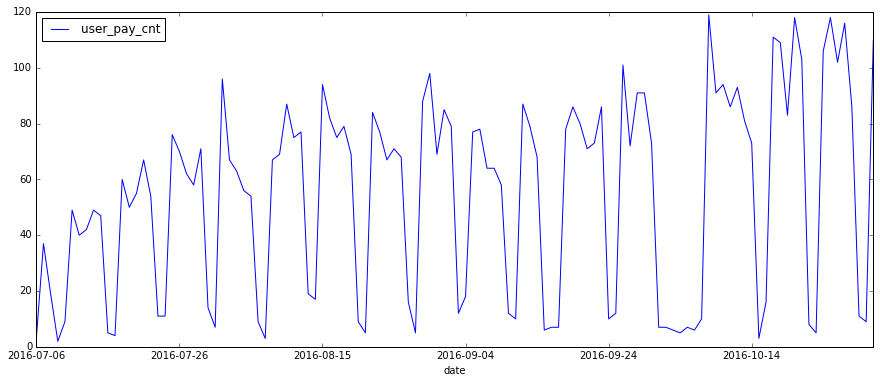

In [20]:
df_shop1 = df_shopPay[df_shopPay.shop_id == 1214]
df_shop1.index = df_shop1.date
df_shop1[['date', 'user_pay_cnt']].plot(kind='line', figsize=(15, 6)) 

## 第四部分

由上面的explore工作，有了如下的问题和启发：
- 有缺失值的商户都是几个列一起缺，则说明这是由于口碑软件的某种问题导致缺失记录。
    - 而且主观上来说商店的评分、评论对于商店的营业好坏有很大的影响，缺失这些值的商店亦会受到一定的影响。故接下来将通过聚类的方法补齐这些这两列缺失值
    - 而商店的3级级别也缺失一部分，仔细研究发现其不是真正的缺失，而是有些商店就只有二级级别。故可以通过融合2级级别与3级级别来获得更细致的级别属性
- 每个商店的pay的历史时序相差有些大有些小，故必须对商店进行聚类处理，聚类的初级思路为：  
1、通过对商店的地点，门级以及shop_level（）进行groupby，而后根据商店历史时序聚类。  
2、根据商店的聚类结果，对缺失score与comment_cnt的值进行预测补全  
3、再对商店重新聚类，此时的聚类不再使用商店地点特征进行聚类，聚类的各自类群将各自使用一个统一的整体模型进行预测  
- view时序与pay时序有相互预测的可能性，需要进行验证，可能可以设置为模型的预测依赖之一


### 提取数据库中所有商店的pay历史时序

In [65]:
## 提取出所有商店的历史pay时序序列
df_shopPay = DataFrame()
    # process row data
nShopOneSql = 100
db = MySQLdb.connect("localhost", "root", "7366798", "tianchi_koubei")
cursor = db.cursor()
for i in range(2000 / nShopOneSql):
    # sql
    sql ='alter table user_pay add index shop_idx (shop_id);'
    sql ='select\
            user_id,\
            shop_id,\
            time\
        from\
            user_pay\
        where\
            shop_id >= ' + str(i * nShopOneSql + 1) + ' and shop_id <= '+ str(i * nShopOneSql + 100) + ';'
    cursor.execute(sql)
    df_pay_100shop = DataFrame(list(cursor.fetchall()), columns = ['user_id', 'shop_id', 'time'])
    # process row data
    df_pay_100shop['time'] = pd.to_datetime(df_pay_100shop['time'])
    df_pay_100shop['date'] = df_pay_100shop['time'].dt.strftime('%Y-%m-%d')
    df_pay_100shop = df_pay_100shop.drop(['time'], axis = 1)
    df_pay_100shop.set_index(['user_id', 'shop_id'])
    # extract
    tab_pay_shop100 = pd.DataFrame(dict(
        user_pay_cnt = df_pay_100shop.groupby(['shop_id', 'date']).size()
    )).reset_index()
    df_shopPay = pd.concat([df_shopPay, tab_pay_shop100], axis = 0)
    print 'Finished %.2f %%' %((i + 1) / float(2000 / nShopOneSql) * 100)
db.close()
df_shopPay.to_csv(PATH + 'df_shopPay.csv', index = False, mode = 'w')

Finished 5.00 %
Finished 10.00 %
Finished 15.00 %
Finished 20.00 %
Finished 25.00 %
Finished 30.00 %
Finished 35.00 %
Finished 40.00 %
Finished 45.00 %
Finished 50.00 %
Finished 55.00 %
Finished 60.00 %
Finished 65.00 %
Finished 70.00 %
Finished 75.00 %
Finished 80.00 %
Finished 85.00 %
Finished 90.00 %
Finished 95.00 %
Finished 100.00 %


In [3]:
df_shopPay = pd.read_csv(PATH + 'df_shopPay.csv')
print df_shopPay[:20]

    shop_id        date  user_pay_cnt
0         1  2015-10-10           188
1         1  2015-10-11           272
2         1  2015-10-12           257
3         1  2015-10-13           239
4         1  2015-10-14           277
5         1  2015-10-15           227
6         1  2015-10-16           242
7         1  2015-10-17           293
8         1  2015-10-18           291
9         1  2015-10-19           256
10        1  2015-10-20           262
11        1  2015-10-21           271
12        1  2015-10-22           260
13        1  2015-10-23           240
14        1  2015-10-24           291
15        1  2015-10-25           286
16        1  2015-10-26           264
17        1  2015-10-27           295
18        1  2015-10-28           310
19        1  2015-10-29           212


### 为每个商店缺失的日期数据进行零插值

In [4]:
print len(pd.DataFrame(df_shopPay['date'].unique(), columns = ['date']))
print len(df_shopPay[df_shopPay.shop_id == 1])

day_dt = pd.to_datetime('2016.10.31') - pd.to_datetime('2015-07-01')
days = day_dt.days + 1
time_begin = pd.to_datetime('2015-07-01')
x = [(time_begin + dt.timedelta(i)).strftime('%Y-%m-%d') for i in range(days)]
print x

493
387
['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31', '2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04', '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16', '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20', '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24', '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28', '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01', '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05', '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09

In [8]:
df_temp = pd.DataFrame()
date_std = sort([(time_begin + dt.timedelta(i)).strftime('%Y-%m-%d') for i in range(days)])
for shop in range(2000):
    df_date = pd.DataFrame(sort(date_std), columns = ['date'])
    df_date['shop_id'] = shop + 1 
    df_temp = pd.concat([df_temp, df_date], axis = 0)
    df_temp['temp'] = 0
print df_temp

           date  shop_id  temp
0    2015-07-01        1     0
1    2015-07-02        1     0
2    2015-07-03        1     0
3    2015-07-04        1     0
4    2015-07-05        1     0
5    2015-07-06        1     0
6    2015-07-07        1     0
7    2015-07-08        1     0
8    2015-07-09        1     0
9    2015-07-10        1     0
10   2015-07-11        1     0
11   2015-07-12        1     0
12   2015-07-13        1     0
13   2015-07-14        1     0
14   2015-07-15        1     0
15   2015-07-16        1     0
16   2015-07-17        1     0
17   2015-07-18        1     0
18   2015-07-19        1     0
19   2015-07-20        1     0
20   2015-07-21        1     0
21   2015-07-22        1     0
22   2015-07-23        1     0
23   2015-07-24        1     0
24   2015-07-25        1     0
25   2015-07-26        1     0
26   2015-07-27        1     0
27   2015-07-28        1     0
28   2015-07-29        1     0
29   2015-07-30        1     0
..          ...      ...   ...
459  201

In [9]:
df_shopPay = pd.merge(
    df_shopPay[['shop_id', 'date', 'user_pay_cnt']],
    df_temp,
    on = ['shop_id', 'date'], how = 'right'
 ).reset_index()

df_shopPay = df_shopPay[['shop_id', 'date', 'user_pay_cnt']].fillna(0)
df_shopPay['shop_id'] =  df_shopPay['shop_id'].apply(lambda x: int(x))
df_shopPay.to_csv(PATH + 'df_shopPay_fillna.csv', index = False, mode = 'w')

In [10]:
print df_shopPay['date'].unique()

['2015-10-10' '2015-10-11' '2015-10-12' '2015-10-13' '2015-10-14'
 '2015-10-15' '2015-10-16' '2015-10-17' '2015-10-18' '2015-10-19'
 '2015-10-20' '2015-10-21' '2015-10-22' '2015-10-23' '2015-10-24'
 '2015-10-25' '2015-10-26' '2015-10-27' '2015-10-28' '2015-10-29'
 '2015-10-30' '2015-10-31' '2015-11-01' '2015-11-02' '2015-11-03'
 '2015-11-04' '2015-11-05' '2015-11-06' '2015-11-07' '2015-11-08'
 '2015-11-09' '2015-11-10' '2015-11-11' '2015-11-12' '2015-11-13'
 '2015-11-14' '2015-11-15' '2015-11-16' '2015-11-17' '2015-11-18'
 '2015-11-19' '2015-11-20' '2015-11-21' '2015-11-22' '2015-11-23'
 '2015-11-24' '2015-11-25' '2015-11-26' '2015-11-27' '2015-11-28'
 '2015-11-29' '2015-11-30' '2015-12-01' '2015-12-02' '2015-12-03'
 '2015-12-04' '2015-12-05' '2015-12-06' '2015-12-07' '2015-12-08'
 '2015-12-09' '2015-12-10' '2015-12-11' '2015-12-13' '2015-12-14'
 '2015-12-15' '2015-12-16' '2015-12-17' '2015-12-18' '2015-12-19'
 '2015-12-20' '2015-12-21' '2015-12-22' '2015-12-23' '2015-12-24'
 '2015-12-

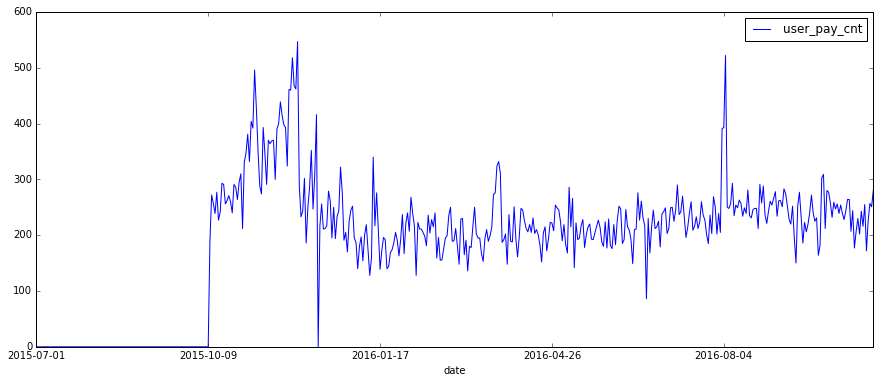

In [42]:
df_shop1 = df_shopPay[df_shopPay.shop_id == 1]
# df_shop1.set_index(['date'])
df_shop1.index = df_shop1.date
df_shop1 = df_shop1.sort_index()
df_shop1[['date', 'user_pay_cnt']].plot(kind='line', figsize=(15, 6)) 

如上发现很多序列并不等长，且2015-12-12的数据被移除，这对于数据处理而言都是问题所在。
对两者的处理方式初步思考：
- 不等长序列可考虑滑窗截取，具体后面实现思考
- 缺失的值由趋势来估计替代

###  聚类

In [9]:
# 处理cate_name缺失
for i in range(len(df_shop)):
    if df_shop.iloc[i]['cate_3_name'] == np.nan:
        df_shop.iloc[i]['cate_3_name'] = df_shop.iloc[i]['cate_2_name']
print len(df_shop['cate_3_name'].unique())

# city_name 没用到？
print len(df_shop.groupby(['location_id', 'cate_3_name', 'shop_level']))

44
1836


如上发现使用'location_id', 'cate_3_name', 'shop_level'这三个特征进行groupby后类别太多，不利用缺失值得补全工作，故去掉location_id特征

In [7]:
print len(df_shop.groupby(['cate_3_name', 'shop_level']))

81


#### 根据时序波形序列进行kmeans聚类

In [48]:
## 生成数据集
len_sample = days
cnt = 0
samples = np.zeros([len(df_shop), len_sample])
for i in range(len(df_shop)):
    shop_cur = df_shop['shop_id'].iloc[i]
    df_temp = df_shopPay[df_shopPay.shop_id == shop_cur]
    df_temp.index = df_temp.date
    df_temp = df_temp.sort_index()
    sample = df_temp['user_pay_cnt'].values
    samples[i] = sample
    cnt = cnt + 1
    if (cnt % 100) == 0:
        print 'Finished %d shop' %(cnt)

Finished 100 shop
Finished 200 shop
Finished 300 shop
Finished 400 shop
Finished 500 shop
Finished 600 shop
Finished 700 shop
Finished 800 shop
Finished 900 shop
Finished 1000 shop
Finished 1100 shop
Finished 1200 shop
Finished 1300 shop
Finished 1400 shop
Finished 1500 shop
Finished 1600 shop
Finished 1700 shop
Finished 1800 shop
Finished 1900 shop
Finished 2000 shop


In [69]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K_list = range(100);
metric = []
for k in K_list:
    model_km = KMeans(n_clusters=k+10, max_iter=300, random_state=None, n_jobs=4).fit(samples)
    metric.append(sum(np.min(cdist(samples, model_km.cluster_centers_, 'euclidean'), axis=1)) / samples.shape[0])
    print 'Finished %d clusters' %(k+10)

Finished 10 clusters
Finished 11 clusters
Finished 12 clusters
Finished 13 clusters
Finished 14 clusters
Finished 15 clusters
Finished 16 clusters
Finished 17 clusters
Finished 18 clusters
Finished 19 clusters
Finished 20 clusters
Finished 21 clusters
Finished 22 clusters
Finished 23 clusters
Finished 24 clusters
Finished 25 clusters
Finished 26 clusters
Finished 27 clusters
Finished 28 clusters
Finished 29 clusters
Finished 30 clusters
Finished 31 clusters
Finished 32 clusters
Finished 33 clusters
Finished 34 clusters
Finished 35 clusters
Finished 36 clusters
Finished 37 clusters
Finished 38 clusters
Finished 39 clusters
Finished 40 clusters
Finished 41 clusters
Finished 42 clusters
Finished 43 clusters
Finished 44 clusters
Finished 45 clusters
Finished 46 clusters
Finished 47 clusters
Finished 48 clusters
Finished 49 clusters
Finished 50 clusters
Finished 51 clusters
Finished 52 clusters
Finished 53 clusters
Finished 54 clusters
Finished 55 clusters
Finished 56 clusters
Finished 57 c

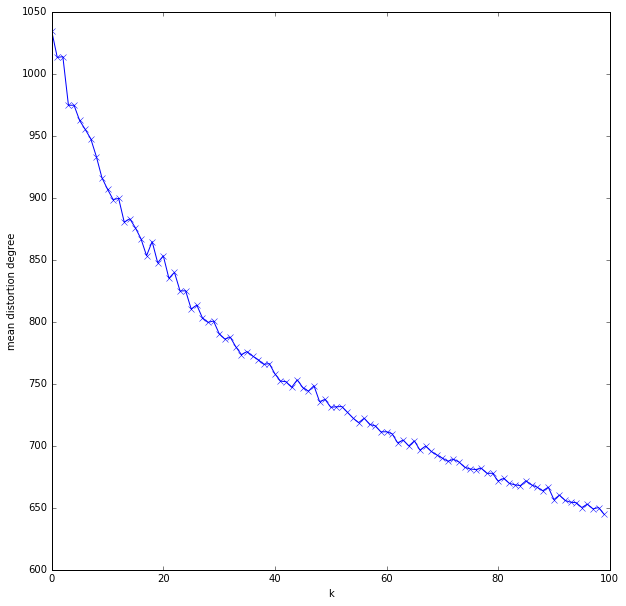

In [78]:
plt.figure(figsize=(10,10))
plt.plot(range(100), metric, 'bx-')
plt.xlabel('k')
plt.ylabel('mean distortion degree')

#### 使用40个簇的kmean算法

In [124]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
nCluster = 30
model_km = KMeans(n_clusters=nCluster, max_iter=300, random_state=None, n_jobs=4).fit(samples)

# 丢弃数量低于某个阈值的簇
cluster = {}
for i in range(nCluster):
    labels = pd.DataFrame(model_km.labels_, columns = ['label'])
    cluster[i] = labels[labels.label == i].index.tolist()

noise_cluster = []
noise_gate = 10
for i in cluster:
    if len(cluster[i]) < noise_gate:
        noise_cluster.append(i)
print 'cluster smaller than %d: %s' %(noise_gate, noise_cluster)

nSamlpeNotClustered = 0
sampleNotCluster = []
for i in cluster:
    if i in noise_cluster:
        nSamlpeNotClustered = nSamlpeNotClustered + len(cluster[i])
        sampleNotCluster.extend(cluster[i])
print '%d clusters least, %d samples were clustered' %(nCluster - len(noise_cluster), 2000 - nSamlpeNotClustered)
print 'sample not clustered: %s' %(sampleNotCluster)

cluster smaller than 10: [3, 4, 8, 9, 13, 18, 20, 21, 22, 24, 25, 26, 28]
17 clusters least, 1971 samples were clustered
sample not clustered: [1628, 57, 1820, 1927, 516, 730, 529, 1371, 1425, 1708, 1830, 1842, 64, 464, 670, 1256, 1464, 1874, 48, 337, 579, 87, 1071, 1468, 1345, 933, 1295, 1301, 1534]


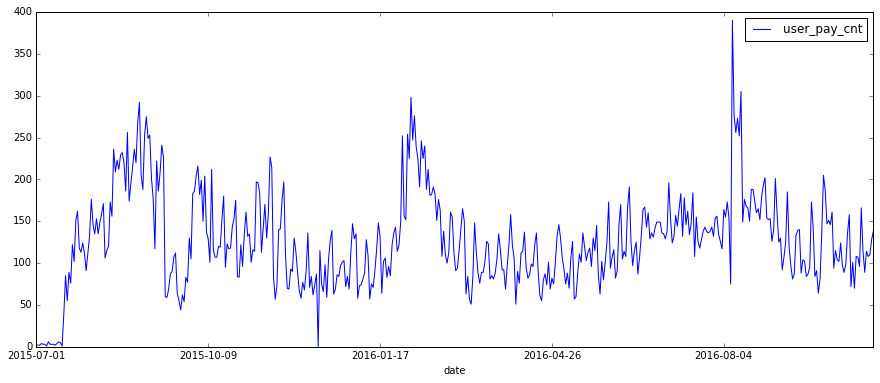

In [127]:
df_shop1 = df_shopPay[df_shopPay.shop_id == 1820]
# df_shop1.set_index(['date'])
df_shop1.index = df_shop1.date
df_shop1 = df_shop1.sort_index()
df_shop1[['date', 'user_pay_cnt']].plot(kind='line', figsize=(15, 6)) 

In [106]:
len(model_km.labels_)

2000

In [101]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=300, min_samples=10, metric = ).fit(samples)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_clusters_ = len(labels)
print('Estimated number of clusters: %d' % n_clusters_)
print labels

Estimated number of clusters: 3
[-1 -1  0 ..., -1 -1 -1]


In [87]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster.dbscan_:

class DBSCAN(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, optional
 |      The maximum distance between two samples for them to be considered
 |      as in the same neighborhood.
 |  
 |  min_samples : int, optional
 |      The number of samples (or total weight) in a neighborhood for a point
 |      to be considered as a core point. This includes the point itself.
 |  
 |  metric : string, or callable
 |      The metric to use when calculating distance between instances in a
 |      feature array. If metric is a string or callable, it must 

In [ ]:
K=range(1,10)
meandistortions=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(
            cdist(X,kmeans.cluster_centers_,
                 'euclidean'),axis=1))/X.shape[0])
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel(u'平均畸变程度',fontproperties=font)
plt.title(u'用肘部法则来确定最佳的K值',fontproperties=font)

In [47]:
## 使用皮尔逊系数比较波形，进行聚类
df_groups_cs = df_shop.groupby(['cate_3_name', 'shop_level'])
len_sample = days
cnt = 0
for name,group in df_groups_cs:
    list_shop = group['shop_id'].unique()
    samples = np.zeros([len(list_shop), len_sample])
    for i in range(len(list_shop)):
        shop_cur = list_shop[i]
        df_temp = df_shopPay[df_shopPay.shop_id == shop_cur]
        df_temp.index = df_temp.date
        df_temp = df_temp.sort_index()
        sample = df_temp['user_pay_cnt'].values
        samples[i] = sample
    cnt = cnt + 1
    if (cnt % 10) == 0:
        print 'Finished %d group' %(cnt)
    #break;

Finished 10 group
Finished 20 group
Finished 30 group
Finished 40 group
Finished 50 group
Finished 60 group
Finished 70 group
